In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [20]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (1).csv


In [21]:
df = pd.read_csv('TSLA.csv')

if 'Date' in df.columns: df = df.sort_values('Date')

df = df[['Open','High','Low','Close']].dropna().astype(np.float32)
df = df[-600:]

df

,Open,High,Low,Close
2356,63.599998,65.344002,62.900002,65.316002
2357,65.828003,68.300003,65.603996,67.108002
2358,66.900002,67.491997,66.500000,67.428001
2359,68.790001,69.837997,68.400002,69.017998
2360,69.379997,70.073997,68.807999,69.986000
...,...,...,...,...
2951,874.489990,907.849976,867.390015,905.390015
2952,914.979980,942.849976,907.090027,921.159973
2953,930.000000,997.859985,921.750000,993.979980
2954,979.940002,1040.699951,976.400024,999.109985


In [22]:
X_all = df[['Open','High','Low','Close']].values
y_all = df[['Close']].values

In [23]:
n = int(len(X_all)*0.8)

Xsc, Ysc = MinMaxScaler(feature_range=(-1,1)), MinMaxScaler(feature_range=(-1,1))

X_tr = Xsc.fit_transform(X_all[:n])
X_te = Xsc.transform(X_all[n:])

y_tr = Ysc.fit_transform(y_all[:n])
y_te = Ysc.transform(y_all[n:])

In [33]:
w = 3
def mk(X, y, w):
    Xs, ys = [], []
    for i in range(len(X)-w):
        Xs.append(X[i:i+w])
        ys.append(y[i+w])
    return np.array(Xs, np.float32), np.array(ys, np.float32)

X_train, y_train = mk(X_tr, y_tr, w)
X_test,  y_test  = mk(X_te, y_te, w)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(w, X_train.shape[-1])),   # (30,4)
    tf.keras.layers.SimpleRNN(128, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(128, dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='mse')

In [37]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, shuffle=True)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0042
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 13/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 14/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065
Epoch 15/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [38]:
y_pred = model.predict(X_test, verbose=0)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.8f}")

MSE: 0.08807974


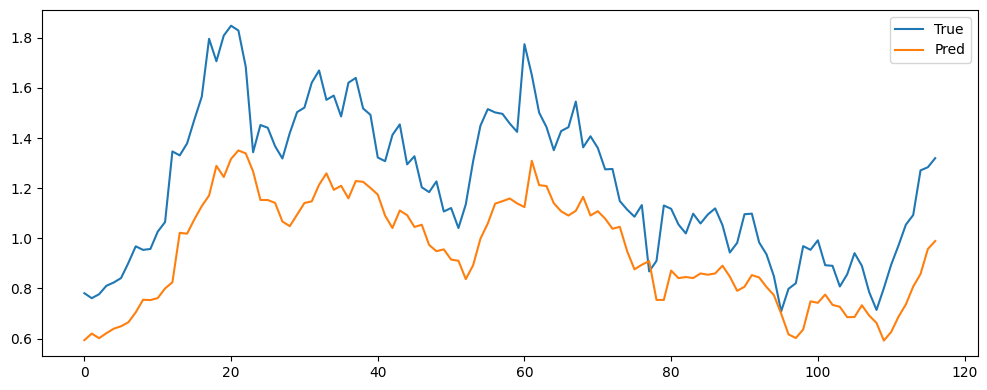

In [39]:
plt.figure(figsize=(10,4))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Pred')
plt.legend(); plt.tight_layout(); plt.show()